<a href="https://colab.research.google.com/github/Stas0101/-forAdmissionToTheMagistracy/blob/main/9_3_%D0%9E%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D1%81%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D0%BE%D0%B9_%D1%81%D0%B5%D1%82%D0%B8_LeNet_5_MNIST_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Сверточные сети. Обучение сверточной сети  - LeNet-5 - MNIST**

In [1]:
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt   # библиотека построения графиков 
plt.style.use('ggplot')   # устанавливаем стиль построения графиков
tf.random.set_seed(42)

In [2]:
# Загрузим набор данных рукописных цифр - MNIST 
(x_train, y_tr), (x_test, y_tt) = tf.keras.datasets.mnist.load_data()
 
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) 
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
 
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
 
# нормировка данных 
x_train /= 255 
x_test /= 255
 
print('train shape:', x_train.shape, y_tr.shape) 
print('test shape:', x_test.shape, y_tt.shape)
 
# кодирование выходов для задачи классификации (one hot) 
num_classes = 10 
y_train = tf.keras.utils.to_categorical(y_tr, num_classes) 
y_test = tf.keras.utils.to_categorical(y_tt, num_classes) 
y_tr[0], y_train[0]


11490434/11490434 [==============================] - 1s 0us/step
train shape: (60000, 28, 28, 1) (60000,)
test shape: (10000, 28, 28, 1) (10000,)


(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

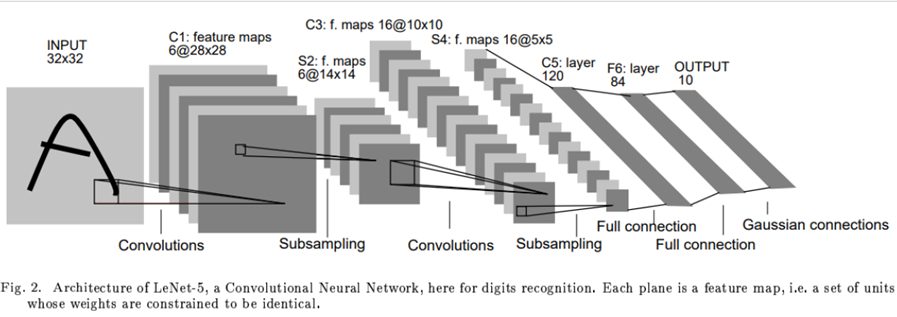

Рис.1. Архитектура сверточной сети LeNet-5, предназначенной для распознавания рукописных цифр с картинок размера 28х28.Точность распознвания на MNIST составила более 99%.

# **Конструируем LeNet-5**

Отметим некоторые важные замечания к исследованию, которое связано с исследованием архитектуры LeNet^

- У нас будут небольшие изменения по сравнению с оригиналом - на входе мы имеем картинку размера 28x28. Поэтому в первом сверточном слое мы используем, padding='same', с сохранением размера картинки.
- Кроме того, оригинальная LeNet использовала настраиваемый слой подвыборки - т.е. использовался не MaxPooling, а некоторая свертка с весовой матрицей, также обучаемой. Мы используем MaxPooling.
- В оригинальной LeNet была сложная матрица перехода от 6 карт признаков к 16 картам - использовалась матрица связей -какая карта из 16 от каких карт зависит. Мы оставим нейросети самой решать это. Будем оптимизировать эти зависимости.
- В оригинальной LeNet использовалась sigmoid после подвыборочных слоев, tanh - в полносвязном слое с 84 нейронами ииспользовалась RBF - в выходном слое. Мы попробуем разные функции активации. На выходе используем зарекомендовавший себя softmax.

В оригинальной LeNet слой c5 является фактически полносвязным слоем, но можно его считать и сверточным слоем с 120 ядрами размером 5*5. Он может стать чисто сверточным, если мы увеличим размер карт в предыдущем слое.

В начале мы попробуем использовать оригинальную архитектуру LeNet.

**Вход:** картинка размером 28x28;

**Архитектура**

- Слой C1 (conv-1): 6 ядер размером 5*5, stride=(1,1), padding='same';
- Слой S2: MaxPooling 2x2;
- Слой C3 (conv-2): 16 ядер размером 5*5, stride=(1,1);
- Слой S4: MaxPooling 2x2;
- Слой C5 (conv-3): 120 ядер размером 5*5, stride=(1,1);
- Слой FC6: 84 нейрона; fa = tanh;
- Слой OUTPUT: 10 нейронов, softmax;

In [3]:
# Задача №4 в тесте № 9
# model_CNN = tf.keras.models.Sequential()
# model_CNN.add(tf.keras.layers.Input(shape=(30,30,1)))
# model_CNN.add(tf.keras.layers.Convolution2D(filters= 7, kernel_size=(5,5)) )
# model_CNN.add(tf.keras.layers.MaxPooling2D())
# model_CNN.add(tf.keras.layers.Convolution2D(filters=3, kernel_size=(3,3), activation='relu'))
# model_CNN.add(tf.keras.layers.Flatten())
# model_CNN.add(tf.keras.layers.BatchNormalization())
# model_CNN.add(tf.keras.layers.Dropout(0.5))
# model_CNN.add(tf.keras.layers.Dense(10, activation='softmax'))
# model_CNN.summary()

In [4]:
# Задача №5 в тесте № 9

# model_CNN = tf.keras.models.Sequential()
# model_CNN.add(tf.keras.layers.Input(shape=(28,28,1)))
# model_CNN.add(tf.keras.layers.Convolution2D(filters=8, kernel_size=(7,7), activation='linear', padding='same' ) )
# model_CNN.add(tf.keras.layers.MaxPooling2D())
# model_CNN.add(tf.keras.layers.Convolution2D(filters=16, kernel_size=(5,5), activation='linear'))
# model_CNN.add(tf.keras.layers.MaxPooling2D())
# model_CNN.add(tf.keras.layers.Convolution2D(filters=90, kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform'))
# model_CNN.add(tf.keras.layers.Flatten())
# model_CNN.add(tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
# model_CNN.add(tf.keras.layers.Dense(10, activation='softmax'))
# model_CNN.summary()

In [5]:
# Задача №5(продолжение) в тесте № 9

# model_CNN.compile(
#     loss='categorical_crossentropy',
#     optimizer=tf.keras.optimizers.Adam(),
#     metrics=['accuracy'])

In [6]:
# Задача №5(продолжение) в тесте № 9

# model_CNN.fit(
#     x_train, y_train,
#     batch_size=256,
#     epochs=10,
#     validation_data=(x_test, y_test)  )

In [7]:
# Задача №5(продолжение) в тесте № 9

# # проверяем точность модели на тестовой выборке 
# loss, accuracy = model_CNN.evaluate(x_test, y_test, verbose=0) 
# print('Test loss:', loss) 
# print('Test accuracy:', accuracy)

In [8]:
# инициируем модель нейросети 
model_CNN = tf.keras.models.Sequential() 
# описываем входной слой: 
model_CNN.add(tf.keras.layers.Input(shape=(28,28,1))) 
# свертка C1 
model_CNN.add(tf.keras.layers.Convolution2D(filters=6, kernel_size=(5,5), activation='linear', padding = 'same'))
model_CNN.add(tf.keras.layers.MaxPooling2D())
 
model_CNN.add(tf.keras.layers.Convolution2D(filters=16, kernel_size=(5,5), activation='linear'))
model_CNN.add(tf.keras.layers.MaxPooling2D())
 
model_CNN.add(tf.keras.layers.Convolution2D(filters=120, kernel_size=(5,5), activation='relu'))
model_CNN.add(tf.keras.layers.Flatten())
 
model_CNN.add(tf.keras.layers.Dense(84, activation='tanh')) 
model_CNN.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
 
model_CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

In [9]:
# задача №2 в тесте №9

# # инициируем модель нейросети 
# model_CNN = tf.keras.models.Sequential() 
# # описываем входной слой: 
# model_CNN.add(tf.keras.layers.Input(shape=(11,11,1))) 
# # свертка C1 
# model_CNN.add(tf.keras.layers.Convolution2D(filters=6, kernel_size=(6,6), strides= (2,2), activation='linear', padding = 'same'))
# # model_CNN.add(tf.keras.layers.MaxPooling2D())
# model_CNN.summary()

In [10]:
# задача №3 в тесте №9

# # inp = tf.keras.layers.Input(shape=(11,11,1))
# # x = tf.keras.layers.Convolution2D(filters= 6, kernel_size= (6, 6)) (inp)
# # x = tf.keras.layers.AveragePooling2D() (x)
# # инициируем модель нейросети 
# model_CNN = tf.keras.models.Sequential() 
# # описываем входной слой: 
# model_CNN.add(tf.keras.layers.Input(shape=(9,9,1))) 
# # свертка C1 
# model_CNN.add(tf.keras.layers.Convolution2D(filters=8, kernel_size=(6,6), activation='linear', padding = 'same'))
# model_CNN.add(tf.keras.layers.AveragePooling2D())
# model_CNN.summary()


In [11]:
# Готовим модель для обучения 
model_CNN.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [12]:
# обучаем модель 
batch_size = 256 
epochs = 50
 
history = model_CNN.fit(
    x_train, y_train,    
    batch_size=batch_size,    
    epochs=epochs,    
    verbose=1,    
    validation_data=(x_test, y_test) 
)

Epoch 1/50
235/235 [==============================] - 18s 10ms/step - loss: 0.3716 - accuracy: 0.8966 - val_loss: 0.1063 - val_accuracy: 0.9671
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0861 - accuracy: 0.9742 - val_loss: 0.0589 - val_accuracy: 0.9816
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0600 - accuracy: 0.9816 - val_loss: 0.0468 - val_accuracy: 0.9847
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0449 - accuracy: 0.9863 - val_loss: 0.0404 - val_accuracy: 0.9865
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0368 - accuracy: 0.9888 - val_loss: 0.0378 - val_accuracy: 0.9880
Epoch 6/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0303 - accuracy: 0.9905 - val_loss: 0.0348 - val_accuracy: 0.9876
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0251 - accuracy: 0.9922 - val_loss: 0.0374 - val_accuracy: 0.9876
Epoc

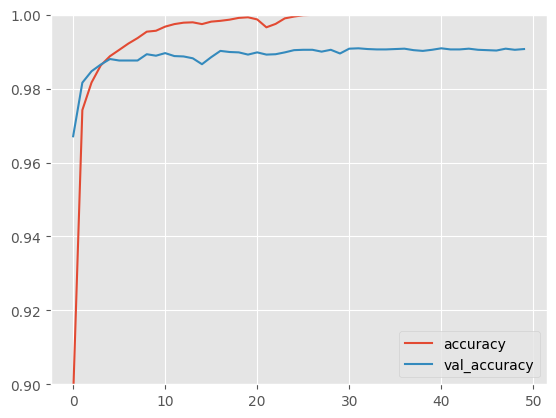

In [13]:
# посмотрим как менялась точность классификатора с ростом эпох 
plt.plot(history.history['accuracy'], label='accuracy') 
plt.plot(history.history['val_accuracy'], label='val_accuracy') 
plt.ylim(0.9, 1.0) 
plt.legend();

In [14]:
# проверяем точность модели на тестовой выборке 
loss, accuracy = model_CNN.evaluate(x_test, y_test, verbose=0) 
print('Test loss:', loss) 
print('Test accuracy:', accuracy)

Test loss: 0.04065777361392975
Test accuracy: 0.9907000064849854


Видим, что первый же запуском мы добились точности выше 99% !

Сохраним данную модель для сравнения и проанализируем ее ошибки

In [15]:
# сохраним обученную модель нейросети LeNet-5
from google.colab import drive
drive.mount ('/content/drive')
dir_path ="/content/drive/My Drive/Colab Notebooks/NEURO_NETs/09 Convolution Nets/data/"
model_CNN.save(dir_path +'LeNet-linear-linear-relu-tanh-softmax')

Mounted at /content/drive


# **Проанализируем ошибки нейросети**

In [16]:
y_predict = np.argmax(model_CNN.predict(x_test), axis=-1) 
fails_nums_cond = np.abs(y_predict - y_tt) > 0 
fails_nums = np.array(range(len(y_test)))[fails_nums_cond] 
sum(fails_nums_cond), len(fails_nums)

313/313 [==============================] - 1s 3ms/step


(93, 93)

9 ( 4),         6 ( 4),         3 ( 5),         9 ( 8),         3 ( 5),         6 ( 2),         .
7 ( 0),         0 ( 8),         5 ( 9),         6 ( 4),         9 ( 8),         0 ( 7),         .
1 ( 2),         9 ( 8),         0 ( 5),         3 ( 5),         7 ( 5),         6 ( 1),         .


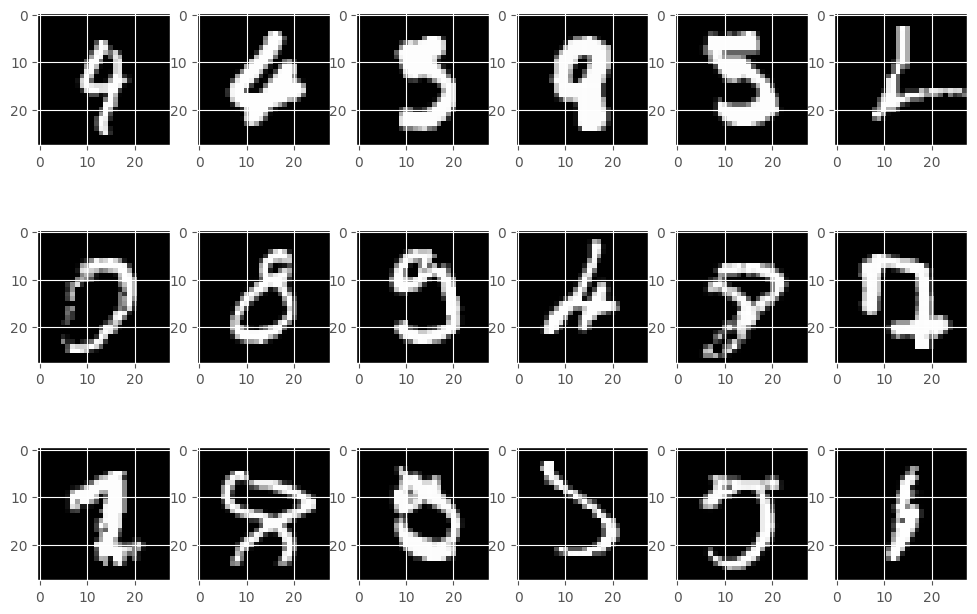

In [17]:
# посмотрим на картинки неверно распознанных цифр 
np.random.seed(1)
 
nums18 = fails_nums[np.random.randint(0,len(fails_nums)-1,18)]
for i in range(len(nums18)):    
  print(y_predict[nums18[i]], '(', y_tt[nums18[i]], end='),         ')    
  if (i+1) % 6 == 0: print('.')
 
plt.figure(figsize=(12, 8)) 
for i in range(len(nums18)):    
  plt.subplot(3, 6, 1 + i )    
  plt.imshow(x_test[nums18[i]].reshape(28,28), cmap=plt.get_cmap('gray')) 
plt.show()

Видим, что некоторые цифры сеть путает. И наверняка можно улучшить ее работу выбрав другие параметры нейросети и добавивслои dropout, попробовав разные функции активации...

# **РЕЗЮМИРУЕМ**

- сверточная сеть с изображениями цифр работает лучше, чем DNN; мы смогли добиться высокой точности более 99% на MNISTдаже не применяя мер для ускорения обучения и борьбы с переобучением;
- мы добились более лучшей точности на CNN, чем на DNN и при этом количество параметров нейросети CNN на порядок меньше, чем в DNN (84K против 670K);
- при этом понадобилось значительно меньше количество итераций.